## DNN 与 dropout

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os,sys,time
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
X_valid, X_train = X_train[:5000],X_train[5000:]
y_valid, y_train = y_train[:5000],y_train[5000:]

In [3]:
# x = (x - u) / std
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train.astype(np.float32))

StandardScaler()

In [4]:
# X_train_std = std_scaler.transform(X_train.astype(np.float32)).reshape(X_train.shape[0],28,28)
# X_valid_std = std_scaler.transform(X_valid.astype(np.float32)).reshape(X_valid.shape[0],28,28)
# X_test_std = std_scaler.transform(X_test.astype(np.float32)).reshape(X_test.shape[0],28,28)

In [5]:
# 使用sequential
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))
# dropout layer 会加在上最邻近的上一层
model.add(keras.layers.AlphaDropout(rate=0.5))
# AlphaDropout vs Dropout
# 1.均值方差不变 2.归一化性质也不变
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

2021-07-25 17:20:20.910319: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
tf.keras.optimizers.Optimizer?

In [7]:
logdir='./dnn-dropout-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_minist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]

2021-07-25 17:20:21.549253: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-25 17:20:21.549281: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-25 17:20:21.550763: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [10]:
#关于全连接层参数量的解释，第一个全连接层为例
#[None, 784]* W +b =[None, 300] W.shape=[784, 300], b=[300]
# 784*300 + 300 = 235500

In [11]:
X_train.shape

(55000, 784)

In [12]:
history = model.fit(X_train, y_train, epochs=5,
         validation_data=(X_valid, y_valid),
                   callbacks=callbacks)

Epoch 1/5


2021-07-25 17:20:21.925589: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


  21/1719 [..............................] - ETA: 20s - loss: 2.7995 - accuracy: 0.1116

2021-07-25 17:20:24.136416: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-25 17:20:24.136440: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-25 17:20:24.145970: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-25 17:20:24.149929: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-25 17:20:24.154997: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./dnn-dropout-callbacks/train/plugins/profile/2021_07_25_17_20_24
2021-07-25 17:20:24.158167: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./dnn-dropout-callbacks/train/plugins/profile/2021_07_25_17_20_24/simodeMacBook-Pro.local.trace.json.gz
2021-07-25 17:20:24.167458: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./dnn-dropout-callbacks/train

1719/1719 [==============================] - 14s 7ms/step - loss: 1.3931 - accuracy: 0.4958 - val_loss: 0.8222 - val_accuracy: 0.7206
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7310 - accuracy: 0.7069 - val_loss: 0.8473 - val_accuracy: 0.7472
Epoch 3/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6304 - accuracy: 0.7515 - val_loss: 0.6151 - val_accuracy: 0.8074
Epoch 4/5
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5592 - accuracy: 0.7954 - val_loss: 0.8650 - val_accuracy: 0.8088
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5208 - accuracy: 0.8129 - val_loss: 0.6137 - val_accuracy: 0.8328


In [13]:
history.history

{'loss': [1.3930587768554688,
  0.7309911847114563,
  0.6304386258125305,
  0.5591794848442078,
  0.5207725763320923],
 'accuracy': [0.4957636296749115,
  0.7068727016448975,
  0.7515454292297363,
  0.7954182028770447,
  0.8128727078437805],
 'val_loss': [0.822152316570282,
  0.8473426699638367,
  0.6150920987129211,
  0.8650214076042175,
  0.6137018799781799],
 'val_accuracy': [0.7206000089645386,
  0.7472000122070312,
  0.8073999881744385,
  0.8087999820709229,
  0.8327999711036682]}

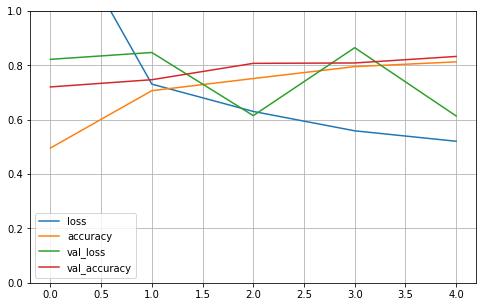

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6623 - accuracy: 0.8120: 0s - loss: 0.6669 - accura


[0.6623190641403198, 0.8119999766349792]